## Setup

In [10]:
from src.phrase_analysis import process_directory, plot_phrase_frequency_over_time_all, plot_length_distribution, analyze_files_phrase_occurrences, get_recent_contexts_all, get_per_appearance_frequency
from src.regex_pattern_generator import generate_regex_patterns
from datetime import datetime

In [11]:
import os
import re
from datetime import datetime
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
plt.style.use('default')
sns.set_theme(style='whitegrid')
plt.rcParams['figure.figsize'] = [12, 6]

# Set pandas display options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [12]:
CONTEXT_WINDOW = 200  # words to display for context

## Define Search Phrases

We'll analyze the following key phrases in press briefings:
Deport
America First
Ukraine
Israel
DOGE / Department of Government Efficiency / Doge
Russia
Elon / Musk
Inflation
Fraud
Intelligence
Crypto
Lawsuit
Egg
GM
Interest Rate
CBS
Ford
Chrysler
Debt Ceiling
Sylvester / Turner

In [13]:
PHRASES = ['Unite',
 'UK / United Kingdom',
 'Two-State / Two State',
 'Trump',
 'Qatar',
 'Peace Deal / Peace Treaty',
 'Palestine / Palestinian',
 'October 7 / October 7th / October Seventh / October Seven',
 'Nuclear',
 'Lebanon',
 'Iran',
 'Hostage',
 'France',
 'Eliminate',
 'Distract',
 'Ceasefire',
 'Canada',
 'Antisemitic / Antisemitism',
 'Abraham',
 '1948']

SEARCH_PHRASES = generate_regex_patterns(PHRASES)

from pprint import pprint
pprint(SEARCH_PHRASES)

{'1948': "\\b(?:\\w+-)*(?:1948|1948S|1948's|1948s'|1948S')(?:-\\w+)*(?=\\W|$)[.,!?;:]*",
 'Abraham': "\\b(?:\\w+-)*(?:abraham|abrahams|abraham's|abrahams')(?:-\\w+)*(?=\\W|$)[.,!?;:]*",
 'Antisemitic / Antisemitism': "\\b(?:\\w+-)*(?:(?:antisemitic|antisemitics|antisemitic's|antisemitics'|antisemitism|antisemitisms|antisemitism's|antisemitisms'))(?:-\\w+)*(?=\\W|$)[.,!?;:]*",
 'Canada': "\\b(?:\\w+-)*(?:canada|canadas|canada's|canadas')(?:-\\w+)*(?=\\W|$)[.,!?;:]*",
 'Ceasefire': "\\b(?:\\w+-)*(?:ceasefire|ceasefires|ceasefire's|ceasefires')(?:-\\w+)*(?=\\W|$)[.,!?;:]*",
 'Distract': "\\b(?:\\w+-)*(?:distract|distracts|distract's|distracts')(?:-\\w+)*(?=\\W|$)[.,!?;:]*",
 'Eliminate': "\\b(?:\\w+-)*(?:eliminate|eliminates|eliminate's|eliminates')(?:-\\w+)*(?=\\W|$)[.,!?;:]*",
 'France': "\\b(?:\\w+-)*(?:france|frances|france's|frances')(?:-\\w+)*(?=\\W|$)[.,!?;:]*",
 'Hostage': "\\b(?:\\w+-)*(?:hostage|hostages|hostage's|hostages')(?:-\\w+)*(?=\\W|$)[.,!?;:]*",
 'Iran': "\\b(?:\\w+-)*(

In [14]:
# Process press briefing transcripts
df = process_directory('../data-netanyahu/raw-transcripts', SEARCH_PHRASES)
df = df.sort_values('date')

# Print dataset statistics
print("Dataset Statistics:")
print(f"Total briefings: {len(df)}")

print("\nWord Count Statistics:")
print(f"Average length: {df['text_length'].mean():.0f} words")

print("\nDate Range:")
# Handle NaT values when printing date ranges
date_min = df['date'].min()
date_max = df['date'].max()
if pd.notna(date_min) and pd.notna(date_max):
    print(f"{date_min.strftime('%Y-%m-%d')} to {date_max.strftime('%Y-%m-%d')}")
else:
    print("No valid dates")

Categories found in directory:
- raw-transcripts
Dataset Statistics:
Total briefings: 15

Word Count Statistics:
Average length: 3706 words

Date Range:
2020-01-01 to 2025-09-15


In [15]:
# Print the titles (filenames) in chronological order
print("\nTitles in Chronological Order:")
for file in df.sort_values('date')['file']:
    print(file)



Titles in Chronological Order:
2020-01-01_Donald Trump Middle East Peace Speech Transcript With Israel PM Netanyahu.txt
2020-9-15_Donald Trump Meeting With Benjamin Netanyahu Transcript September 15.txt
2021-5-1_Netanyahu's Final Speech Transcript As Prime Minister Of Israel (English Translation).txt
2021-5-19_Israel PM Benjamin Netanyahu Speech On Conflict With Gaza Transcript May 19.txt
2023-8-6_Bloomberg Interview With Benjamin Netanyahu Transcript.txt
2023-9-22_Full text of Netanyahu’s UN address: ‘On the cusp of historic Saudi-Israel peace’.txt
2023-10-31_Netanyahu Says No Chance Of Ceasefire Transcript.txt
2023-11-01_Biden And Netanyahu Meet In Israel Transcript.txt
2023-11-6_David Muir Interviews Benjamin Netanyahu.txt
2024-7-15_We’re protecting you: Full text of Netanyahu’s address to Congress.txt
2024-9-27_Prime Minister Benjamin Netanyahu's speech at the UN General Assembly in New York 27 September 2024.txt
2025-1-1_Elon Musk And Benjamin Netanyahu Talk AI And Anti-Semitism.

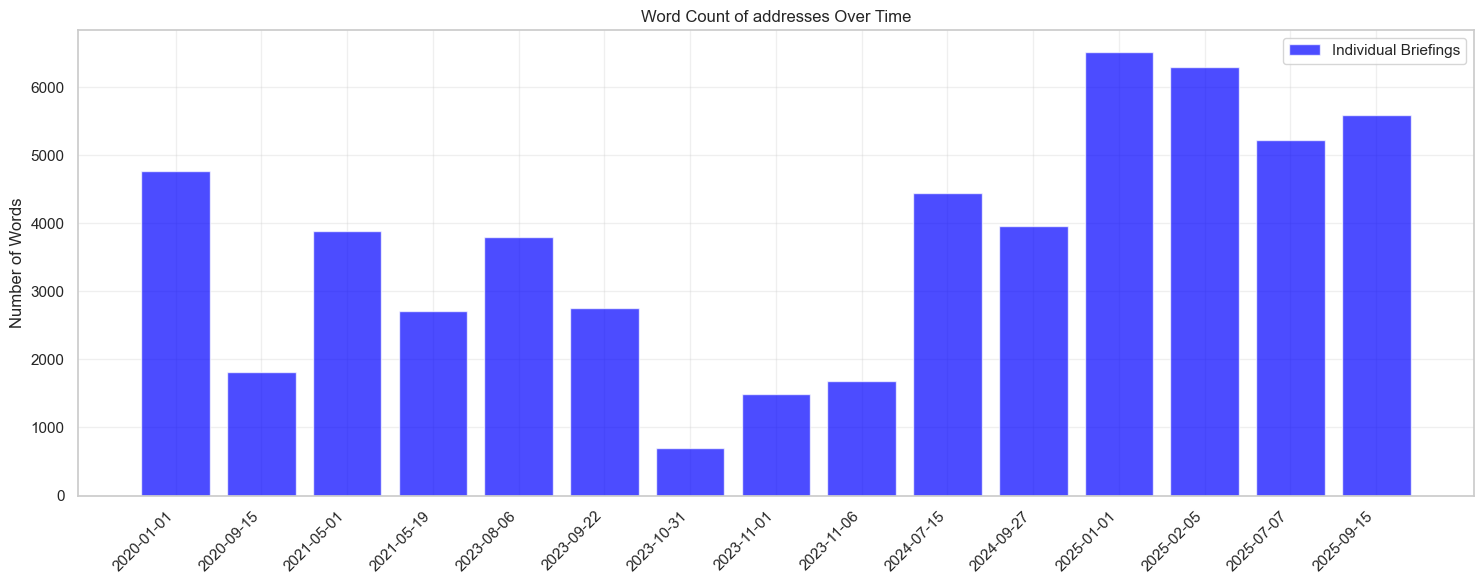


Word Count Summary:
Mean word count: 3706
Median word count: 3879
Min word count: 695
Max word count: 6507


In [16]:
# Plot total word counts over time as a bar chart
plt.figure(figsize=(15, 6))

# Sort dataframe by date to ensure proper ordering
df_sorted = df.sort_values('date')

# Create sequential x positions for side-by-side plotting
x_positions = range(len(df_sorted))

# Create bar plot with sequential positions
bars = plt.bar(x_positions, df_sorted['text_length'], alpha=0.7, color='blue', label='Individual Briefings')

# Format x-axis with date labels at sequential positions
plt.xticks(x_positions, [d.strftime('%Y-%m-%d') for d in df_sorted['date']], rotation=45, ha='right')

plt.title('Word Count of addresses Over Time')
plt.xlabel('') # Remove x-axis label since dates are shown
plt.ylabel('Number of Words')
plt.legend()
plt.grid(True, alpha=0.3)

# Set y-axis to start at 0
plt.ylim(bottom=0)

# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()

# Print summary statistics
print("\nWord Count Summary:")
print(f"Mean word count: {df['text_length'].mean():.0f}")
print(f"Median word count: {df['text_length'].median():.0f}")
print(f"Min word count: {df['text_length'].min():.0f}")
print(f"Max word count: {df['text_length'].max():.0f}")


## Phrase Frequency Analysis

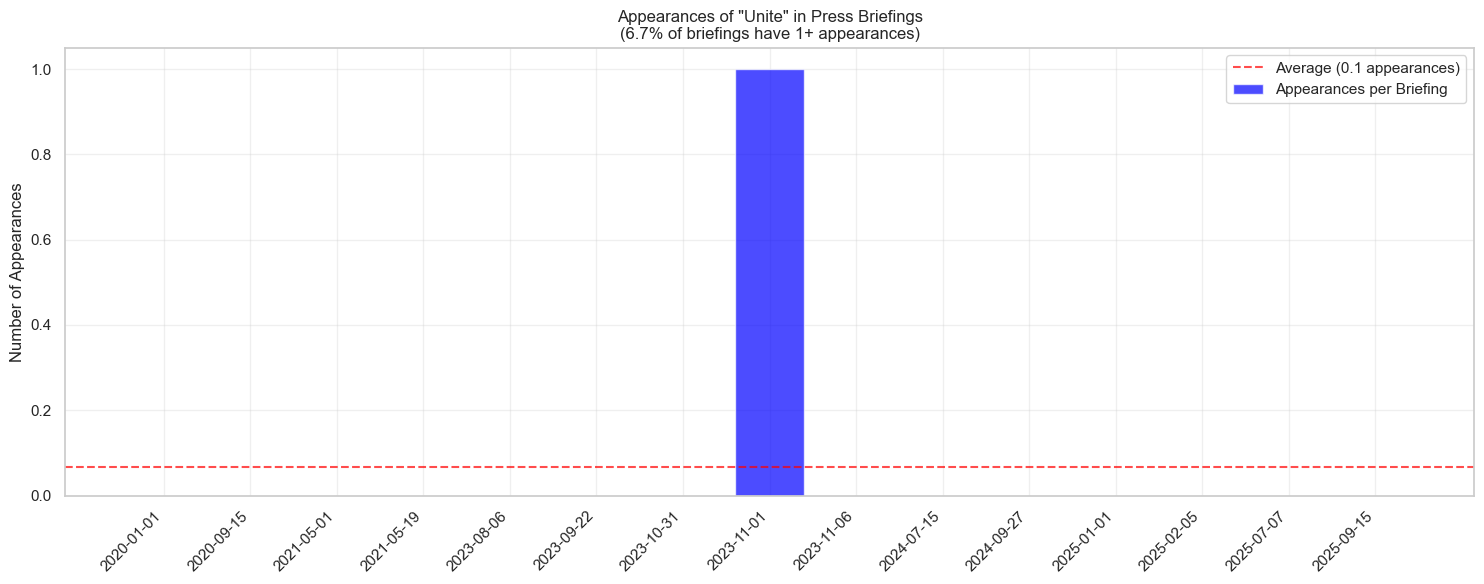

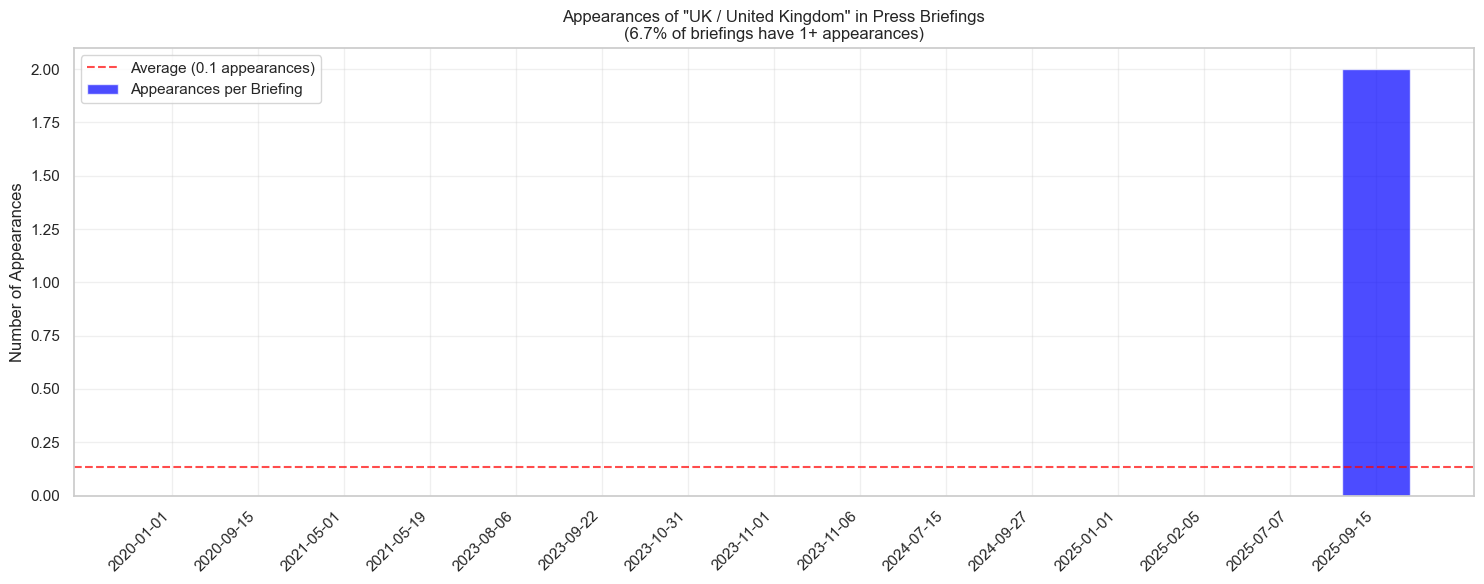

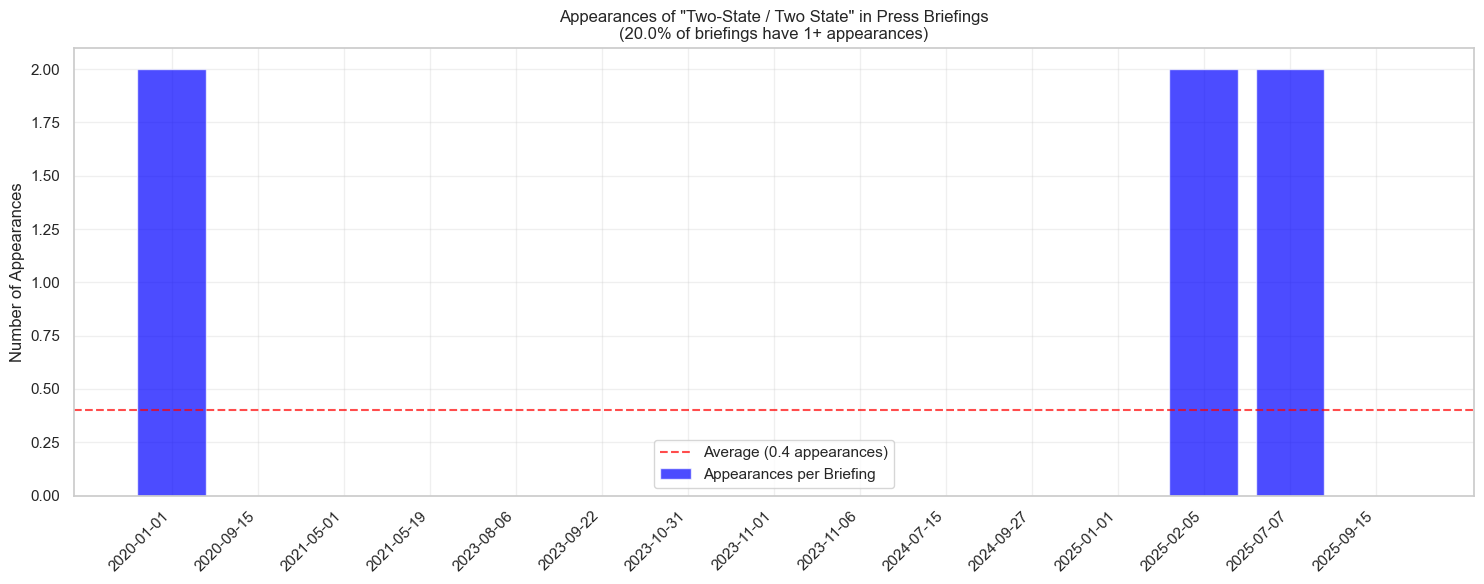

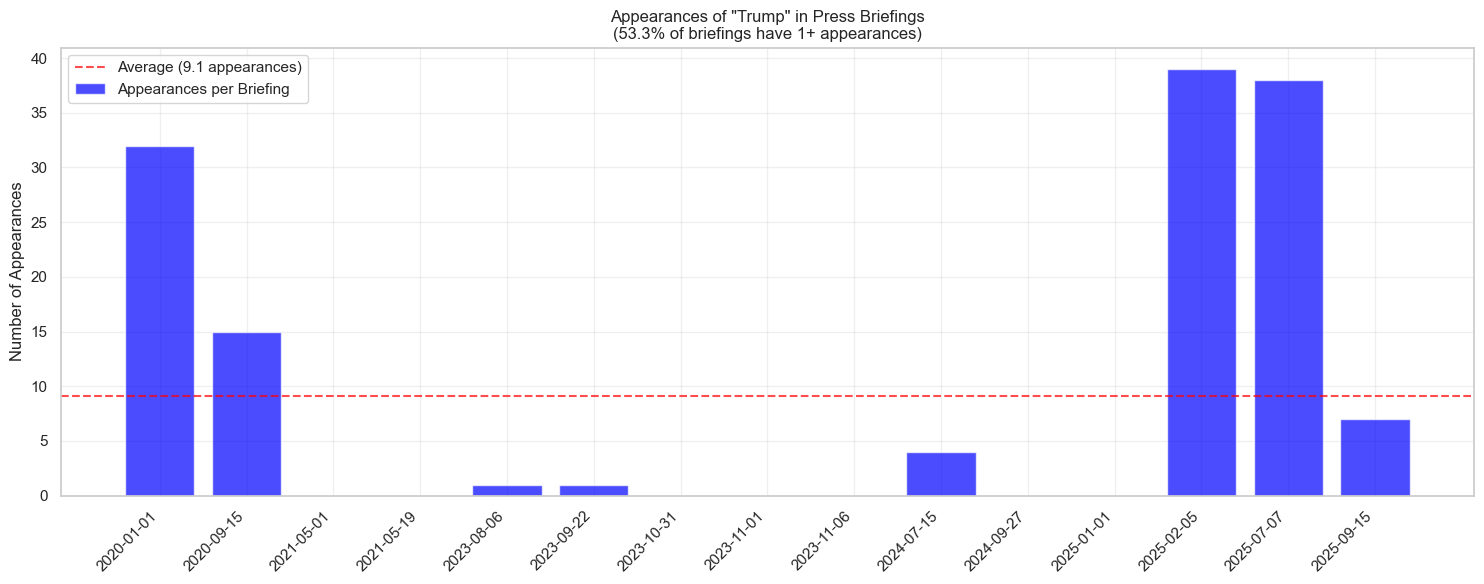

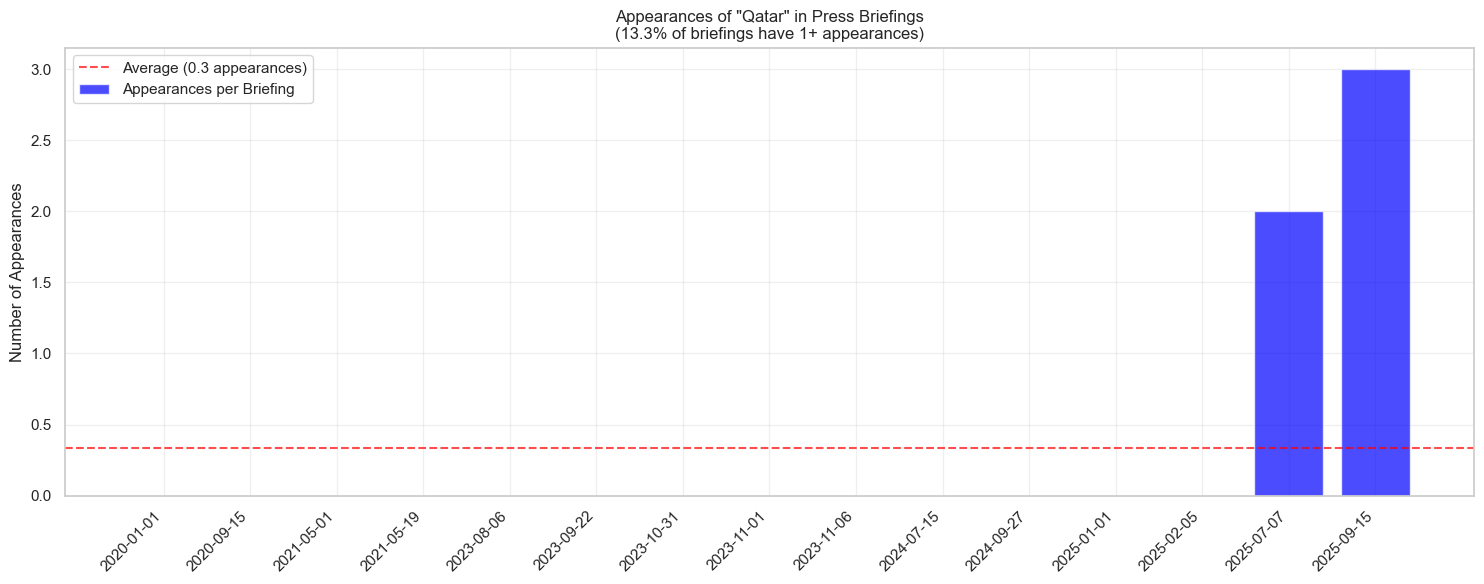

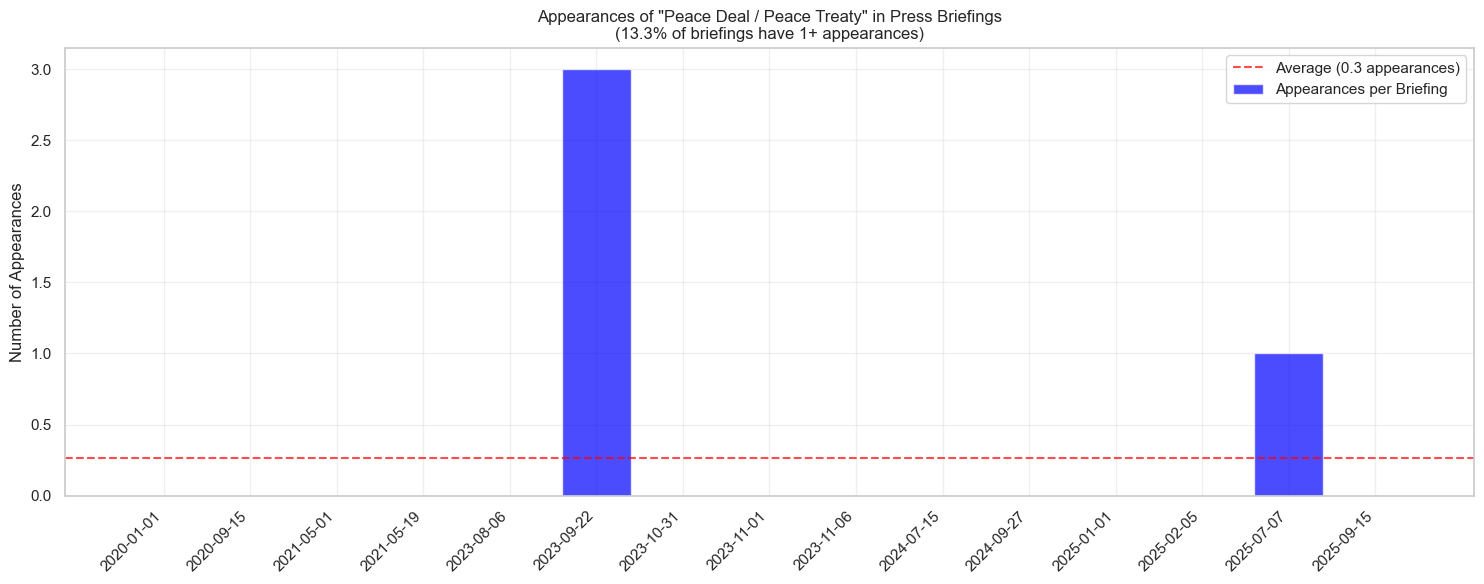

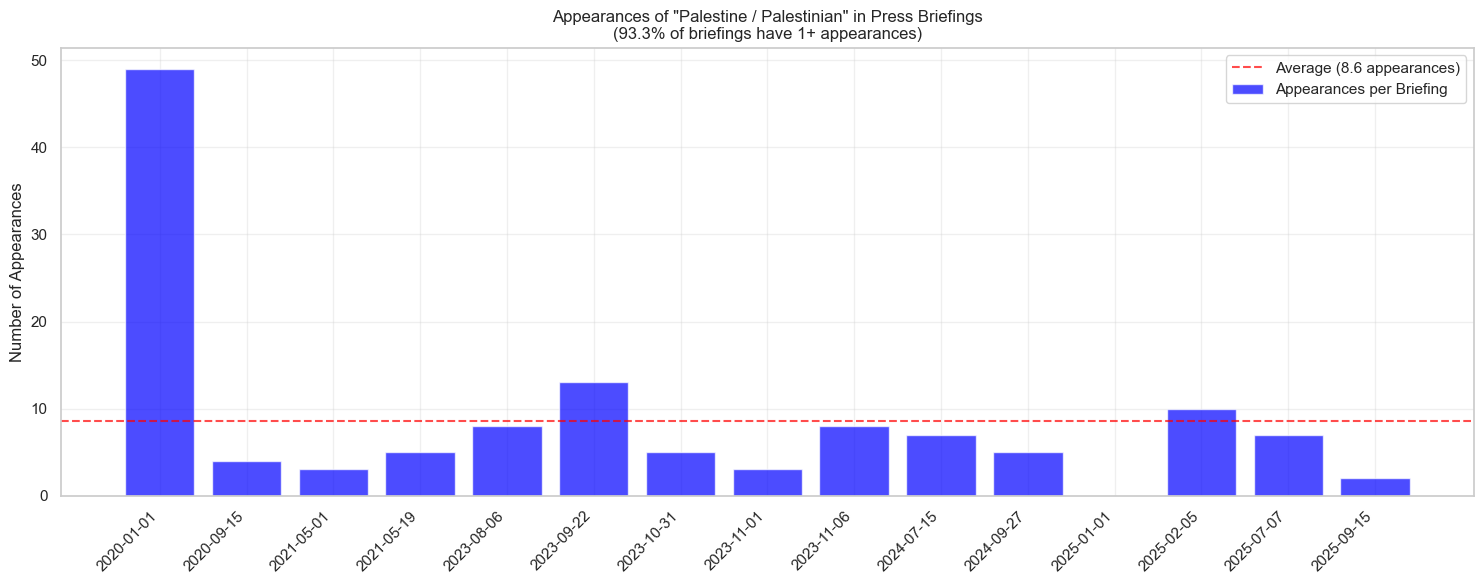

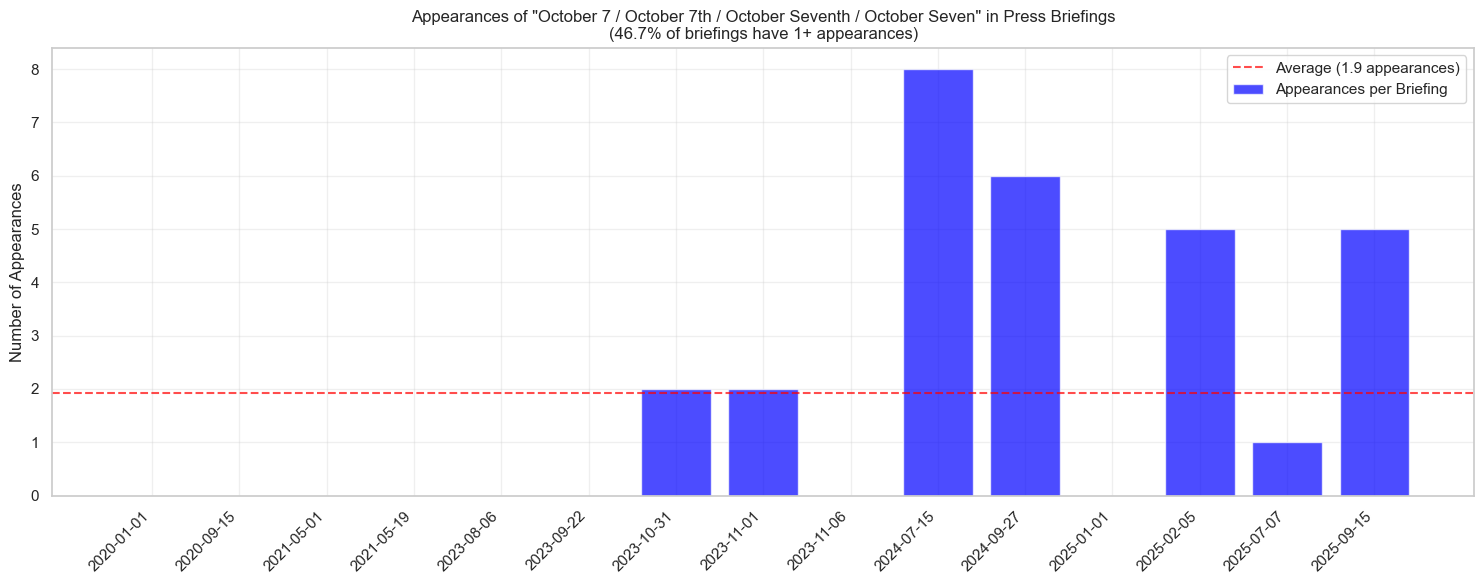

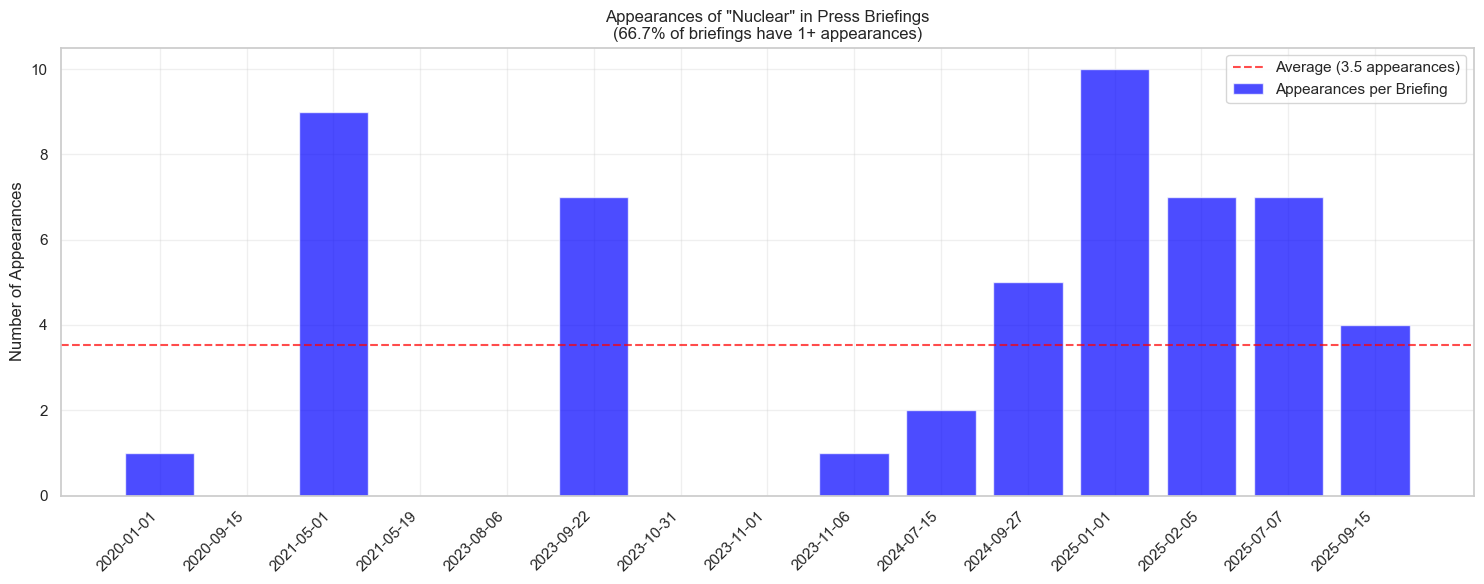

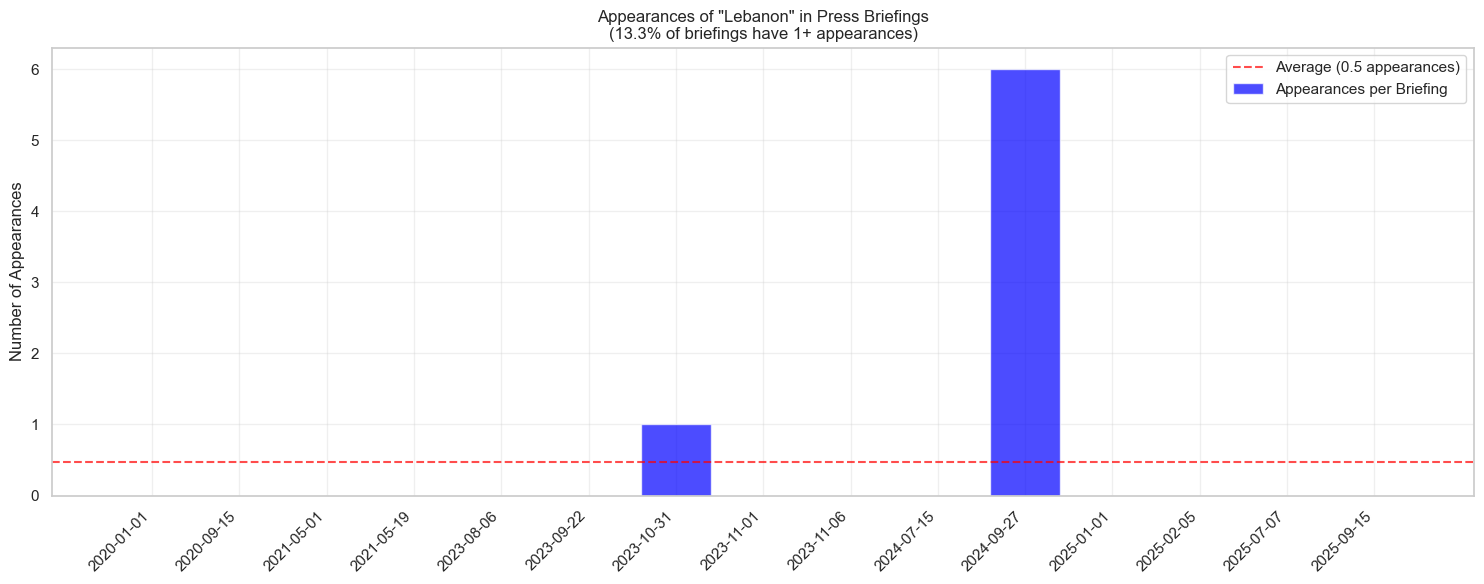

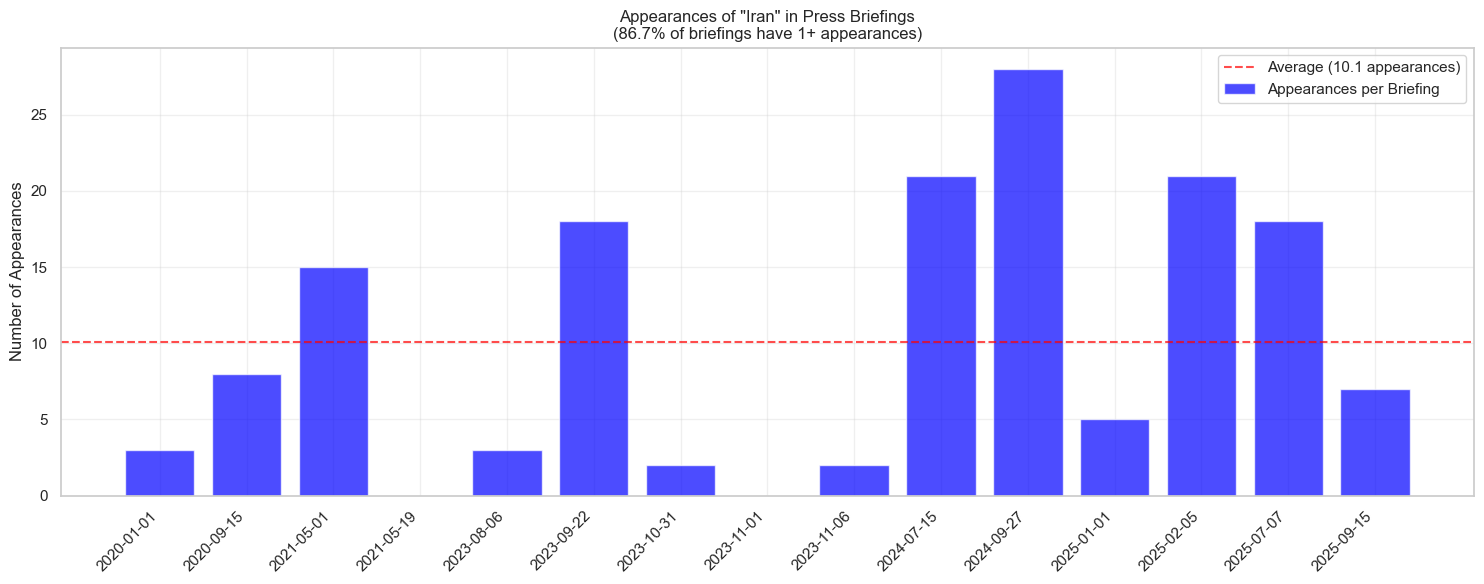

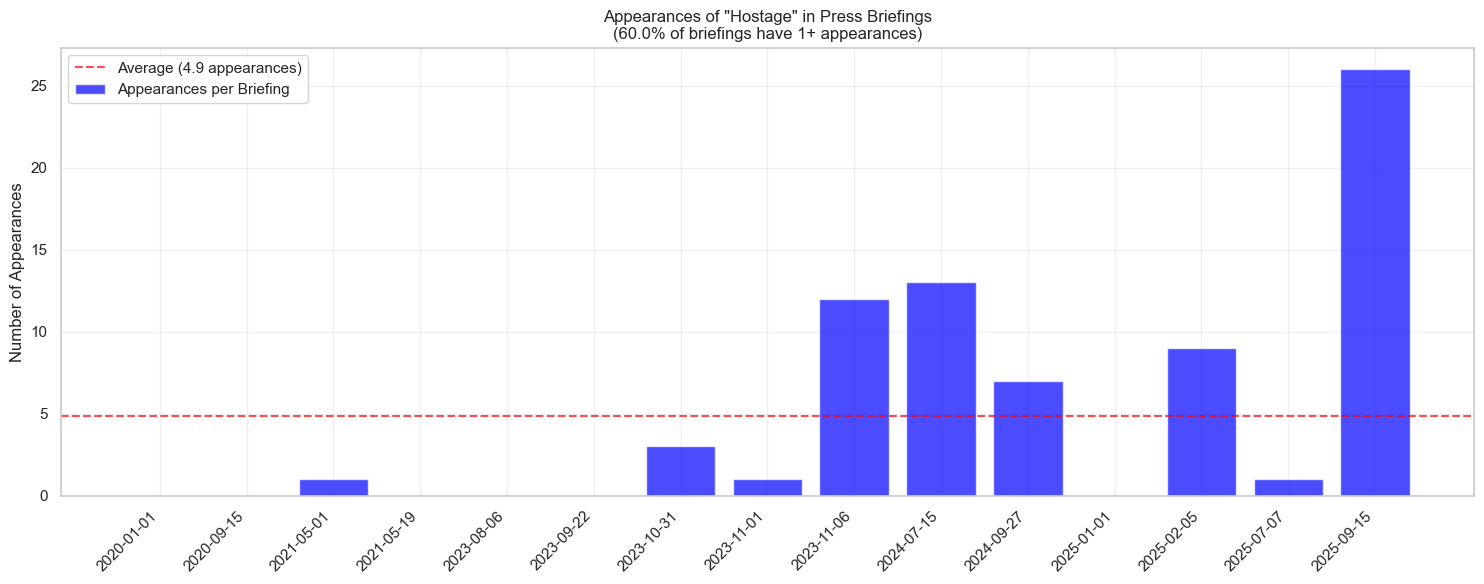

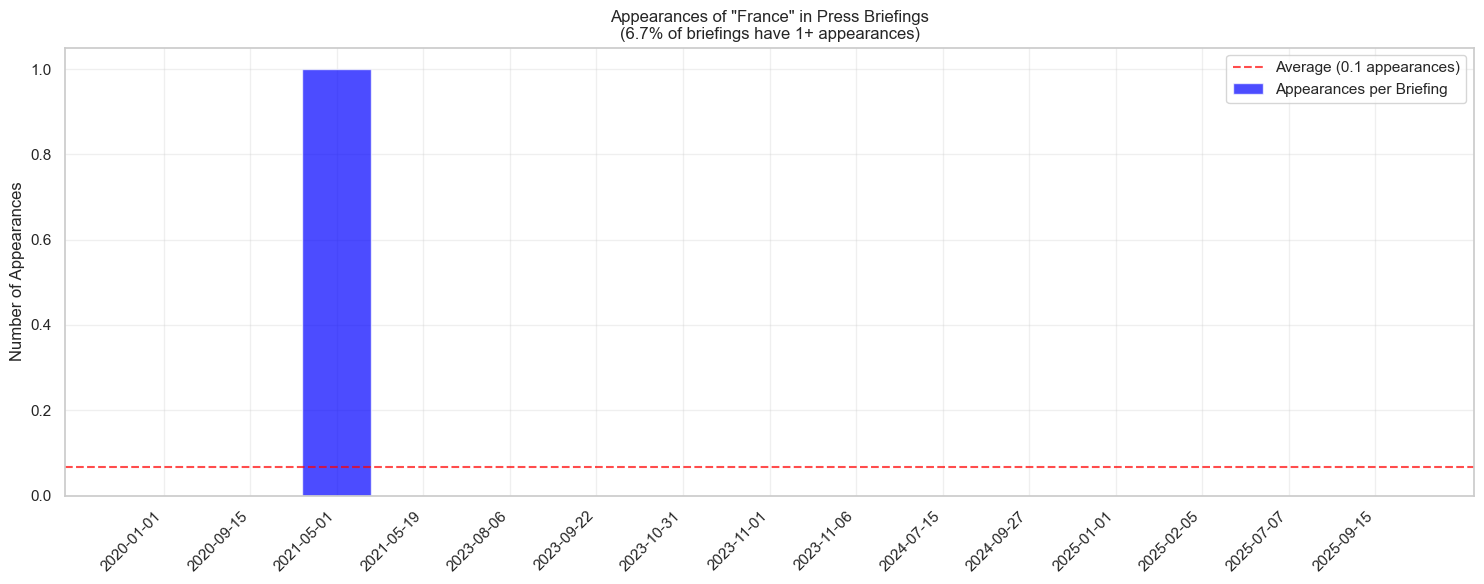

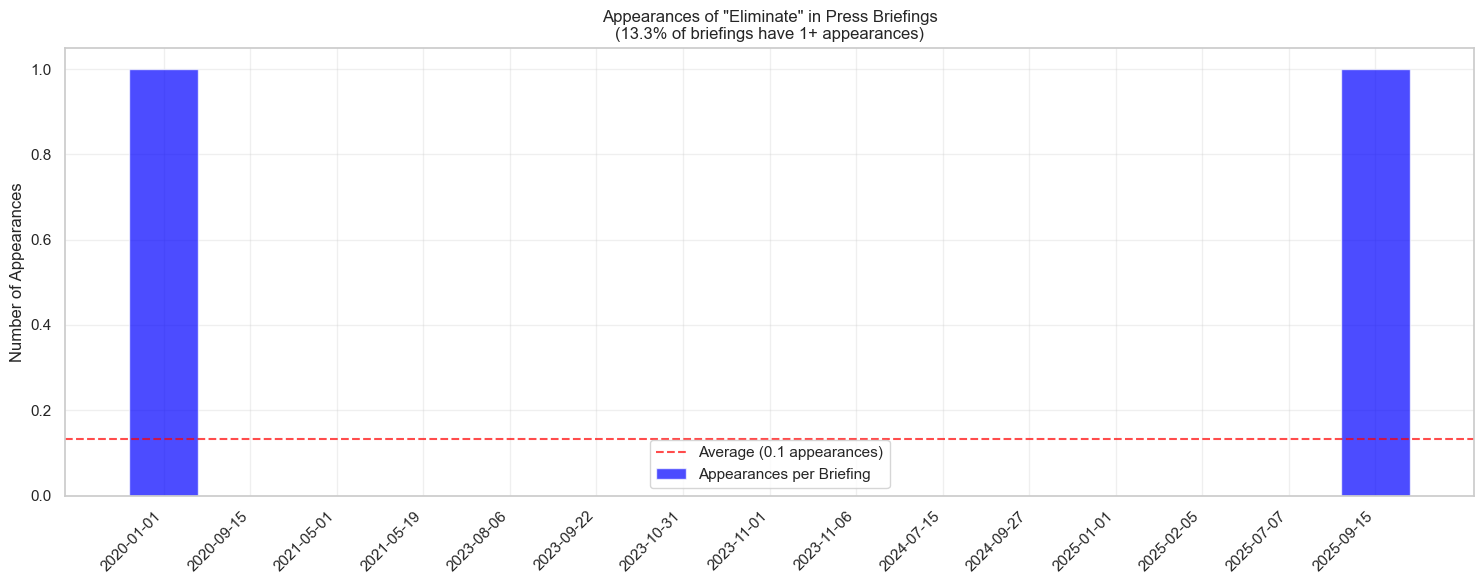

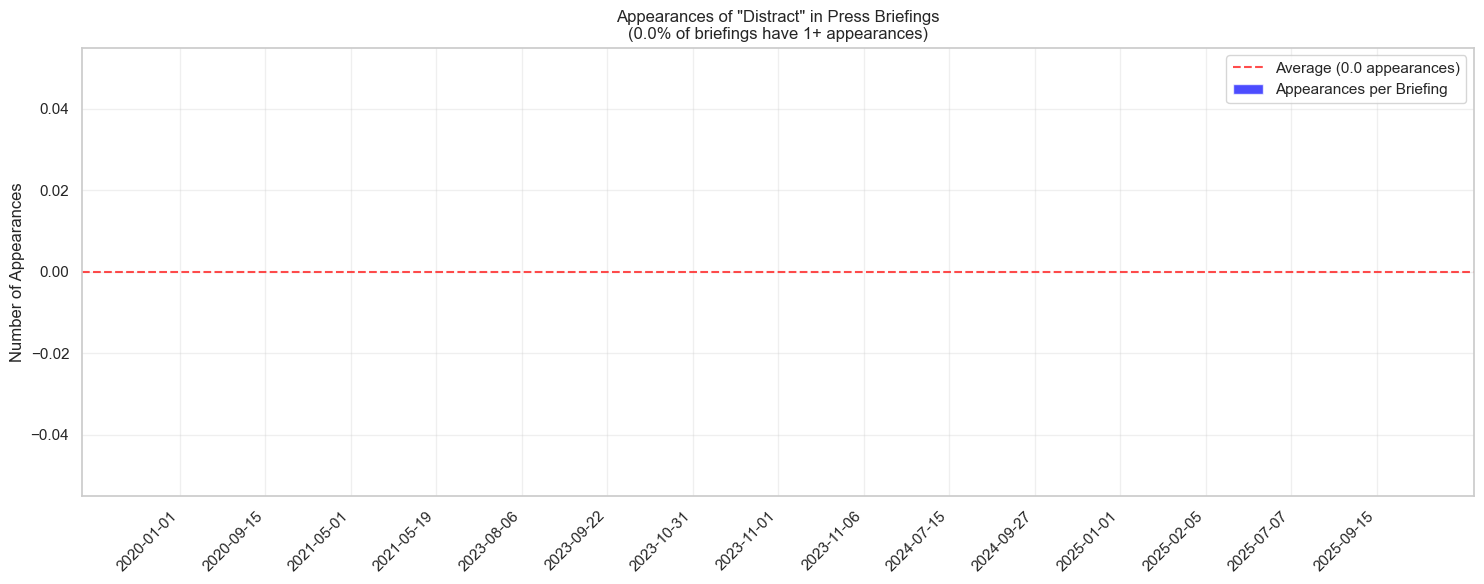

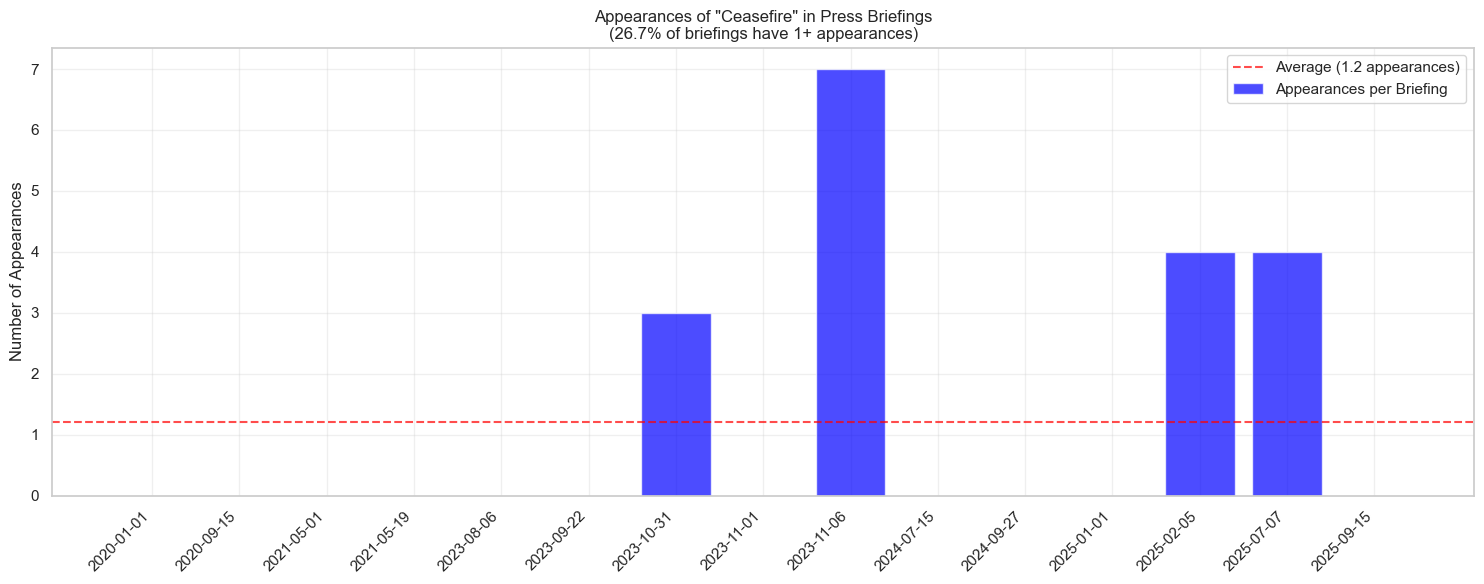

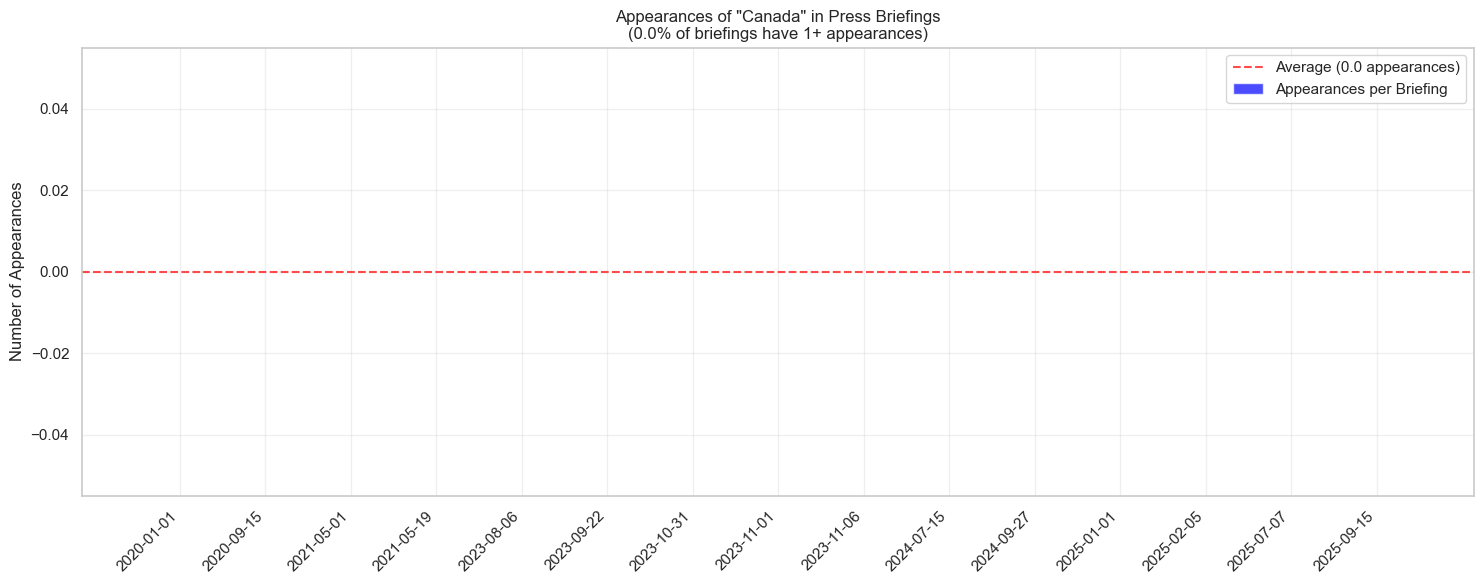

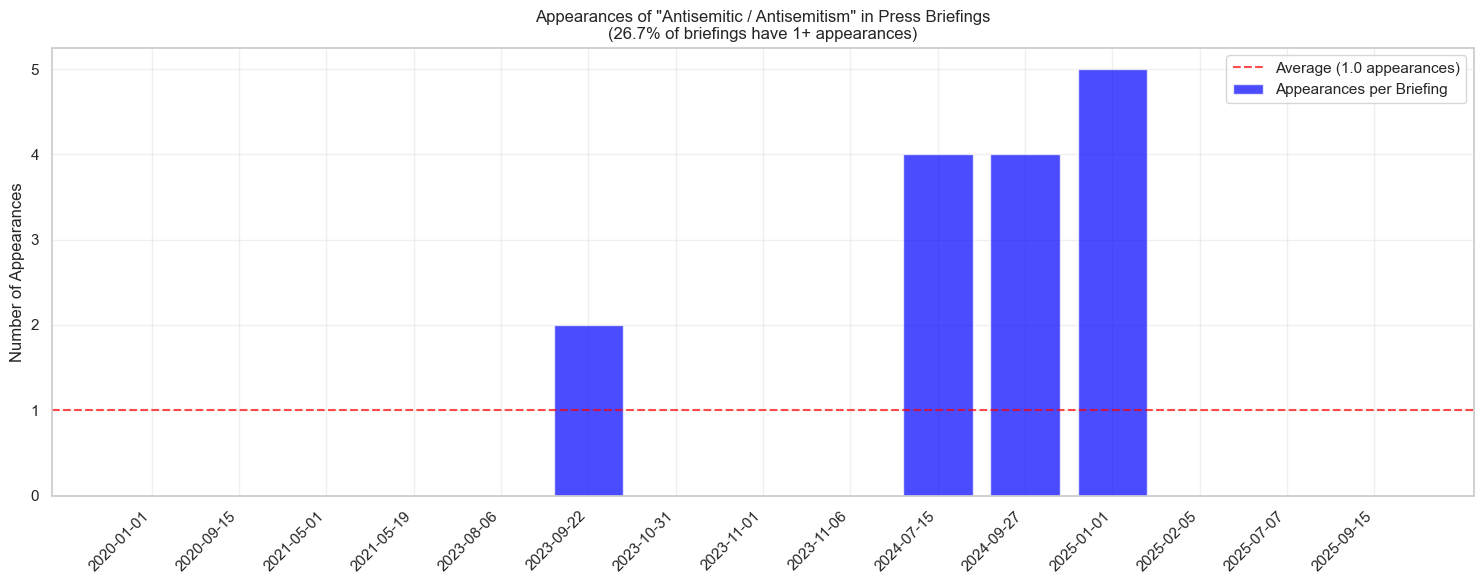

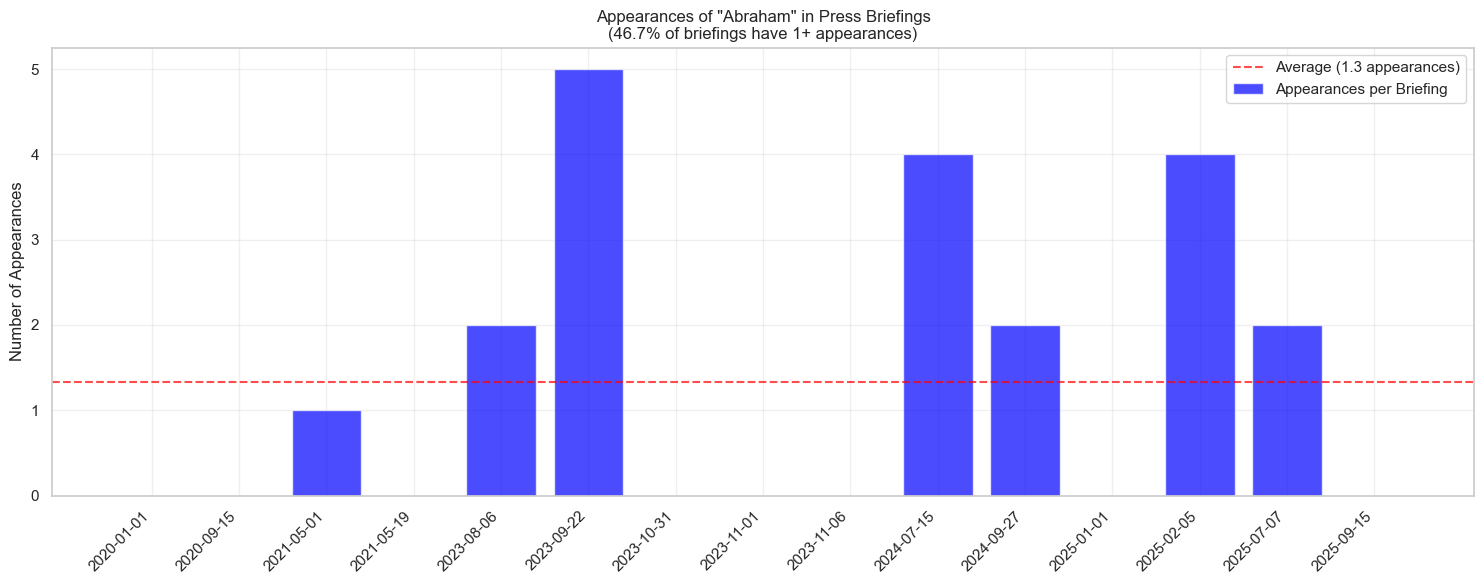

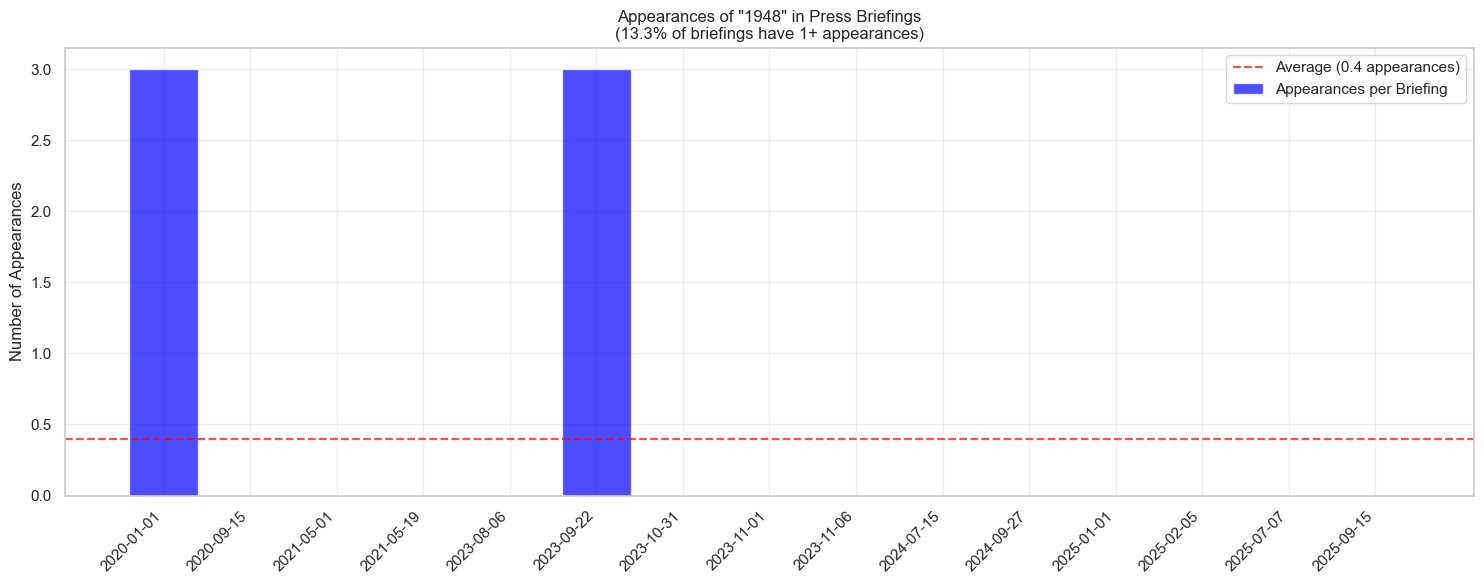

In [17]:
def plot_phrase_frequency_over_time(df, phrase):
    """Plot the frequency of a phrase over time"""
    plt.figure(figsize=(15, 6))
    
    # Get raw counts and dates, sorted by date
    df_sorted = df.sort_values('date')
    counts = df_sorted[phrase]
    dates = df_sorted['date']
    
    # Calculate average and percentage with 1+ appearances
    avg = counts.mean()
    pct_with_appearances = (counts > 0).mean() * 100
    
    # Create sequential x positions (0, 1, 2, 3, ...)
    x_positions = range(len(counts))
    
    # Create bar plot with sequential positions
    bars = plt.bar(x_positions, counts, alpha=0.7, color='blue', 
                   label='Appearances per Briefing')
    
    # Add horizontal line for average
    plt.axhline(y=avg, color='red', linestyle='--', alpha=0.7, 
                label=f'Average ({avg:.1f} appearances)')
    
    # Format x-axis with date labels at sequential positions
    plt.xticks(x_positions, [d.strftime('%Y-%m-%d') for d in dates], 
               rotation=45, ha='right')
    
    plt.title(f'Appearances of "{phrase}" in Press Briefings\n({pct_with_appearances:.1f}% of briefings have 1+ appearances)')
    plt.xlabel('')  # Remove x-axis label since dates are shown
    plt.ylabel('Number of Appearances')
    plt.legend()
    plt.grid(True, alpha=0.3)

    
    plt.tight_layout()
    plt.show()

# Plot time series for all phrases
for phrase in SEARCH_PHRASES.keys():
    plot_phrase_frequency_over_time(df, phrase)

## Recent Usage in Context

## Phrase Usage Statistics

In [ ]:
# Calculate statistics for each phrase
stats_data = []

for phrase in SEARCH_PHRASES.keys():
    stats = {
        'Phrase': phrase,
        'Total Mentions': df[phrase].sum(),
        'Briefings with Mentions': (df[phrase] > 0).sum(),
        'Percentage of Briefings': (df[phrase] > 0).mean() * 100,
        'Average per Briefing': df[phrase].mean(),
        'Max in Single Briefing': df[phrase].max()
    }
    stats_data.append(stats)

stats_df = pd.DataFrame(stats_data)
stats_df = stats_df.sort_values('Total Mentions', ascending=False)

# Format the table
stats_df['Percentage of Briefings'] = stats_df['Percentage of Briefings'].round(1).astype(str) + '%'
stats_df['Average per Briefing'] = stats_df['Average per Briefing'].round(2)

display(stats_df)

,Phrase,Total Mentions,Briefings with Mentions,Percentage of Briefings,Average per Briefing,Max in Single Briefing
0,Percent,316,28,100.0%,11.29,19
1,Musk / Zuckerberg / Bezos,248,28,100.0%,8.86,18
2,Working Class,144,27,96.4%,5.14,19
3,paycheck to paycheck,100,25,89.3%,3.57,13
4,Greed,56,21,75.0%,2.00,7
7,God,35,20,71.4%,1.25,6
9,Israel,22,12,42.9%,0.79,3
5,Robotic / Robotics,19,12,42.9%,0.68,3
10,Putin,16,11,39.3%,0.57,2
8,PhD,10,10,35.7%,0.36,1
